# Восстановление золота из руды

Компания «Цифры» разрабатывает решения для эффективной работы промышленных предприятий. Компании были предоставлены данные с параметрами добычи и очистки. 

**Задача:** подготовить прототип модели машинного обучения для предприятия; модель должна предсказать коэффициент восстановления золота из золотосодержащей руды с целью оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

**План работы:**
1. Подготовка данных;
2. Исследовательский анализ данных;
3. Построение и обучение модели.


## Подготовка данных

### Загрузка и первичный обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.dummy import DummyRegressor 
import os

In [2]:
data_train = pd.read_csv('gold_industry_train.csv')
data_test = pd.read_csv('gold_industry_test.csv')
data_full = pd.read_csv('gold_industry_full.csv')

In [3]:
# проверка обучающего датасета

display(data_train.head())
display('Количество дубликатов:', data_train.duplicated().sum())
display('Количество пропусков:', data_train.isna().sum())
data_train.info()
data_train.describe()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


'Количество дубликатов:'

0

'Количество пропусков:'

date                       0
rougher.input.feed_au      0
rougher.input.feed_ag      0
rougher.input.feed_pb     72
rougher.input.feed_sol    77
                          ..
final.output.recovery      0
final.output.tail_au       0
final.output.tail_ag       1
final.output.tail_pb      75
final.output.tail_sol      5
Length: 87, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,14579.000000,14579.000000,14507.000000,14502.000000,14572.000000,14478.000000,14548.000000,14572.000000,14579.000000,14579.000000,...,13659.000000,14579.000000,14578.000000,14578.000000,14387.000000,14579.000000,14579.000000,14578.000000,14504.000000,14574.000000
mean,8.352941,8.877460,3.604221,36.561420,474.332784,58.922712,12.427399,5.994854,1104.208278,-379.367166,...,7.111347,43.979499,5.192145,9.923809,9.566676,66.759066,3.087939,9.731972,2.719985,10.612745
std,1.934376,1.922536,1.056063,5.209823,108.503552,22.407410,3.428939,1.152873,162.235606,94.652311,...,3.909951,5.471437,1.388014,1.706976,2.805654,10.619709,0.915187,2.358143,0.958929,2.871075
min,0.010000,0.010000,0.010000,0.010000,0.002986,0.049194,0.001083,0.000568,-0.042069,-657.949759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.932996,7.341922,2.880490,34.093951,411.048483,47.278490,10.002832,5.304167,999.644856,-499.861797,...,3.784897,43.345906,4.283347,9.103183,7.860030,63.114596,2.505287,8.088928,2.036512,9.013412
50%,8.225284,8.715859,3.532399,37.097511,498.187968,54.361187,12.003320,6.003053,1000.982624,-300.314199,...,7.629968,44.975014,5.118647,10.046455,9.301970,67.962788,3.029238,9.818512,2.774847,10.670515
75%,9.832210,10.255843,4.257282,39.899799,549.586552,64.464926,14.929903,6.796632,1292.663971,-299.989315,...,10.367050,46.275153,5.925380,10.981203,11.001573,72.598187,3.614098,11.169187,3.353845,12.130827
max,13.731330,14.596026,7.052325,53.475325,717.508837,484.967466,36.118275,9.703448,1512.299531,-273.776101,...,26.000772,52.756638,16.001945,16.705297,19.423912,100.000000,8.245022,19.552149,5.804178,22.317730


Датасет с обущающими данными содержит определенный объем данных, дубликаты не обнаружены, при этом датасет содержит пропуски несущественного объема данных (менее 5% и во второстепенных данных).

In [4]:
# проверка тестового датасета

display(data_test.head())
display('Количество дубликатов:', data_test.duplicated().sum())
display('Количество пропусков:', data_test.isna().sum())
data_test.info()
data_test.describe()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805


'Количество дубликатов:'

0

'Количество пропусков:'

date                                            0
rougher.input.feed_au                           0
rougher.input.feed_ag                           0
rougher.input.feed_pb                          28
rougher.input.feed_sol                         22
rougher.input.feed_rate                         4
rougher.input.feed_size                        44
rougher.input.floatbank10_sulfate               3
rougher.input.floatbank10_xanthate              1
rougher.state.floatbank10_a_air                 1
rougher.state.floatbank10_a_level               1
rougher.state.floatbank10_b_air                 1
rougher.state.floatbank10_b_level               1
rougher.state.floatbank10_c_air                 1
rougher.state.floatbank10_c_level               1
rougher.state.floatbank10_d_air                 0
rougher.state.floatbank10_d_level               0
rougher.state.floatbank10_e_air                 7
rougher.state.floatbank10_e_level               0
rougher.state.floatbank10_f_air                 0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,4860.000000,4860.000000,4832.000000,4838.000000,4856.000000,4816.000000,4857.000000,4859.000000,4859.000000,4859.000000,...,4.859000e+03,4859.000000,4.859000e+03,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000
mean,8.005584,8.547348,3.579662,37.095864,490.285103,59.113400,12.055735,6.101308,1108.635895,-368.340127,...,1.985770e+01,-488.665140,1.557025e+01,-464.176507,16.594103,-490.815250,12.945971,-489.583564,19.053888,-504.678924
std,1.993590,1.958601,1.029377,4.926284,94.371623,19.125122,3.407642,1.042754,156.493143,91.155929,...,5.913105e+00,44.392714,4.927361e+00,65.706994,5.724305,32.258443,5.533176,37.084609,5.548996,38.690186
min,0.010000,0.010000,0.010000,0.010000,0.012786,0.046369,0.018907,0.015783,300.792494,-600.568138,...,1.079872e-16,-799.704969,2.489718e-17,-799.860767,-0.371498,-797.142475,1.358469,-800.006180,0.160386,-809.734800
25%,6.574363,6.975898,2.903612,34.510841,434.099695,47.596984,9.890429,5.499808,999.715729,-499.731972,...,1.501123e+01,-500.704004,1.202172e+01,-500.196517,11.073822,-500.483564,9.011890,-500.129913,14.963953,-500.668501
50%,7.812923,8.179714,3.540772,37.499761,502.118742,55.509481,11.997859,6.099805,1001.414798,-300.181367,...,1.996807e+01,-499.892919,1.501240e+01,-499.540776,16.631195,-499.873136,11.999417,-499.955304,19.960006,-500.033769
75%,9.556589,10.084339,4.199847,40.461315,555.596563,66.661547,14.496072,6.802101,1202.837565,-299.961547,...,2.498900e+01,-498.652030,1.999949e+01,-400.302329,19.983191,-498.852815,15.004198,-499.643776,24.974583,-499.460134
max,13.417156,14.533698,7.142594,53.477742,702.523396,363.989699,30.010759,9.396928,1521.980372,-281.039299,...,3.008450e+01,-383.373053,2.398898e+01,-114.250832,33.215996,-288.963521,24.177106,-141.934397,32.028529,-104.427459


Датасет с тестовыми данными содержит меньший набор признаков по сравнению в обучающими данными, дубликаты не обнаружены, при этом датасет содержит пропуски несущественного объема данных (менее 2% и во второстепенных данных).

В тествой выборке не содержатся данные о результатах выполенных этапов флотации и двух очисток - выходные данные о концентрации металлов и количестве отвальных хвостов на каждом из этапов. Это отсутствие объясняется тем, что для целей теста технлогические процессы по выделению финального концентрата еще не произошли, т.к. именно модель должна предсказать их результат.

In [5]:
# проверка полного датасета

display(data_full.head())
display('Количество дубликатов:', data_full.duplicated().sum())
display('Количество пропусков:', data_full.isna().sum())
data_full.info()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


'Количество дубликатов:'

0

'Количество пропусков:'

date                        0
rougher.input.feed_au       0
rougher.input.feed_ag       0
rougher.input.feed_pb     100
rougher.input.feed_sol     99
                         ... 
final.output.recovery       0
final.output.tail_au        0
final.output.tail_ag        1
final.output.tail_pb      101
final.output.tail_sol       6
Length: 87, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


Датасет с полными данными представляет собой объединение тестовых и обучающих данных, дубликаты не обнаружены, при этом датасет содержит пропуски несущественного объема данных менее 5% по ряду столбцов и около 9% в столбце secondary_cleaner.output.tail_sol, которые представляет собой второстепенные данные.

In [6]:
# проверка расчета эффективности обогащения после этапа флотации

data_train['rougher.output.recovery_recalc'] = (
    (data_train['rougher.output.concentrate_au'] * (data_train['rougher.input.feed_au'] - data_train['rougher.output.tail_au']))
    / (data_train['rougher.input.feed_au'] * 
       (data_train['rougher.output.concentrate_au'] - data_train['rougher.output.tail_au']))*100
)

(data_train['rougher.output.recovery_recalc'] - data_train['rougher.output.recovery']).sum()/len(data_train)

-1.6369678398616069e-16

In [7]:
# проверка расчета эффективности обогащения после этапа очистки

data_train['final.output.recovery_recalc'] = (
    (data_train['final.output.concentrate_au'] * (data_train['rougher.input.feed_au'] - data_train['final.output.tail_au']))
    / (data_train['rougher.input.feed_au'] * (data_train['final.output.concentrate_au'] - data_train['final.output.tail_au']))
    *100
)

(data_train['final.output.recovery_recalc'] - data_train['final.output.recovery']).sum()/len(data_train)


-8.477682511002666e-16

Ручной пересчёт показал, что разница с имеющимися показателями recovery стремится к 0, поэтому можно сделать вывод, что в датасете содержатся корретные показатели эффективности обогащения rougher.output.recovery и final.output.recovery - после этапов флотации и очистки.

In [8]:
# расчет MAE

mae_rougher = mean_absolute_error(data_train['rougher.output.recovery'], data_train['rougher.output.recovery_recalc'])
mae_final = mean_absolute_error(data_train['final.output.recovery'], data_train['final.output.recovery_recalc'])
mae_rougher, mae_final

(9.83758577644259e-15, 8.569602032360358e-15)

Показатель MAE - среднее абсолютное отклонение между предоставленными данными эффективности обогащения на этапах флотации и очистки и рассчитанными данным эффективности обогащения - стремится к 0, поэтому можно сделать вывод, что в датасете содержатся корретные показатели эффективности обогащения.

### Предобработка данных

In [9]:
# проверка списка признаков из обучающей выборки, недоступного на тестовой выборке

common_columns = data_train.columns.intersection(data_test.columns)
unique_columns = data_train.columns.difference(common_columns)
unique_columns

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.recovery_recalc',
       'final.output.tail_ag', 'final.output.tail_au', 'final.output.tail_pb',
       'final.output.tail_sol', 'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.

Обзор уникальных столбцов обучающего датасета, которые отсутствуют в тестовом датасете, показал, что в тестовом датасете отсутвуют признаки, которые соответсвуют последующим этапам технологического процесса флотации и последующей очистки.

In [10]:
# заполнение пропусков соседними значениями, т.к.условии указано, что соседние по времени параметры часто похожи

data_train = data_train.fillna(method = 'ffill')
data_test = data_test.fillna(method = 'ffill')
data_full = data_full.fillna(method = 'ffill')
print('Количество пропусков в train:', data_train.isna().sum().sum())
print('Количество пропусков в test:', data_test.isna().sum().sum())
print('Количество пропусков в full:', data_full.isna().sum().sum())

Количество пропусков в train: 0
Количество пропусков в test: 0
Количество пропусков в full: 0


В рамках предобработки данных:
- датасет с обучающими данными приведен в соответветствие с тестовым датасетом (из обучающих данных удалены столбцы, отсутствующие в тестовых данных с предварительным сохранением целевых показателей),
- пропуски в всех трёх датасетах заполнены ближайшими значениями.

### Промежуточный вывод

По результатам предобработки данных можно сделать следующие выводы:
1. Датасет с обущающими данными содержит определенный объем данных, дубликаты не обнаружены, при этом датасет содержит пропуски несущественного объема данных (менее 5% и во второстепенных данных).
2. Датасет с тестовыми данными содержит меньший набор признаков по сравнению в обучающими данными, дубликаты не обнаружены, при этом датасет содержит пропуски несущественного объема данных (менее 2% и во второстепенных данных).
В тествой выборке не содержатся данные о результатах выполенных этапов флотации и двух очисток - выходные данные о концентрации металлов и количестве отвальных хвостов на каждом из этапов. Это отсутствие объясняется тем, что для целей теста технлогические процессы по выделению финального концентрата еще не произошли, т.к. именно модель должна предсказать их результат.

3. Датасет с полными данными представляет собой объединение тестовых и обучающих данных, дубликаты не обнаружены, при этом датасет содержит пропуски несущественного объема данных менее 5% по ряду столбцов и около 9% в столбце secondary_cleaner.output.tail_sol, которые представляет собой второстепенные данные.

Целевой признак эффективности обогащения, recovery, был пересчитан вручную для проверки данных. Ручной пересчёт показал, что разница с имеющимися показателями recovery стремится к 0, поэтому можно сделать вывод, что в датасете содержатся корретные показатели эффективности обогащения rougher.output.recovery и final.output.recovery (после этапов флотации и очистки).

В рамках предобработки данных:
- пропуски в всех трёх датасетах заполнены ближайшими значениями.

## Анализ данных

### Концентрация металлов на различных этапах обработки

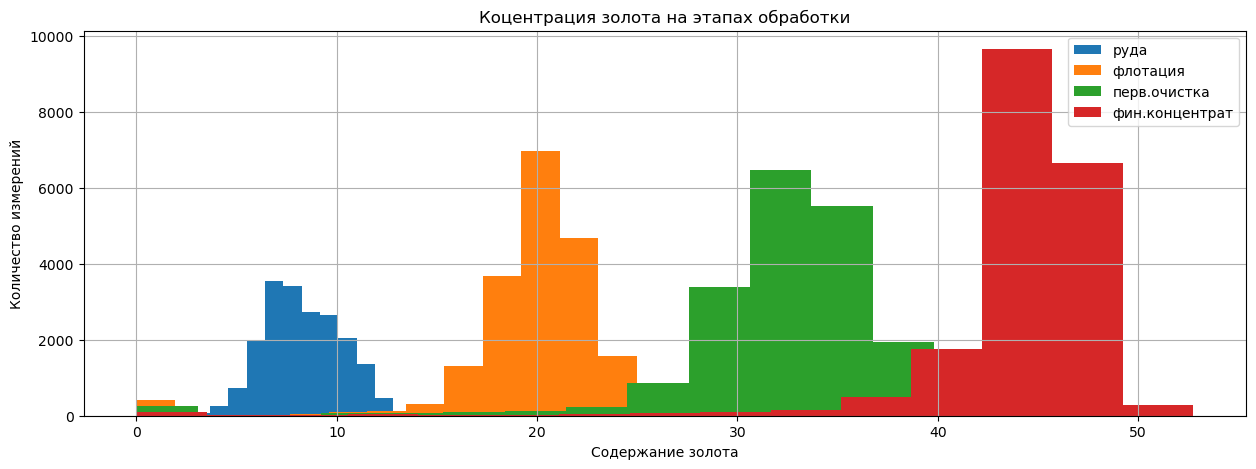

In [11]:
# анализ концентрации золота на различных этапах

data_full['rougher.input.feed_au'].hist(bins = 15, figsize = (15,5), label = 'руда');
data_full['rougher.output.concentrate_au'].hist(bins = 15, figsize = (15,5), label = 'флотация');
data_full['primary_cleaner.output.concentrate_au'].hist(bins = 15, figsize = (15,5), label = 'перв.очистка');
data_full['final.output.concentrate_au'].hist(bins = 15, figsize = (15,5), label = 'фин.концентрат');
plt.title('Коцентрация золота на этапах обработки')
plt.ylabel('Количество измерений')
plt.xlabel('Содержание золота')
legend = True
plt.legend(loc='upper right')
plt.show()

Концентрация золота значительно возрастает на каждом этапе и достигает максмального значения в финальном концентрате.

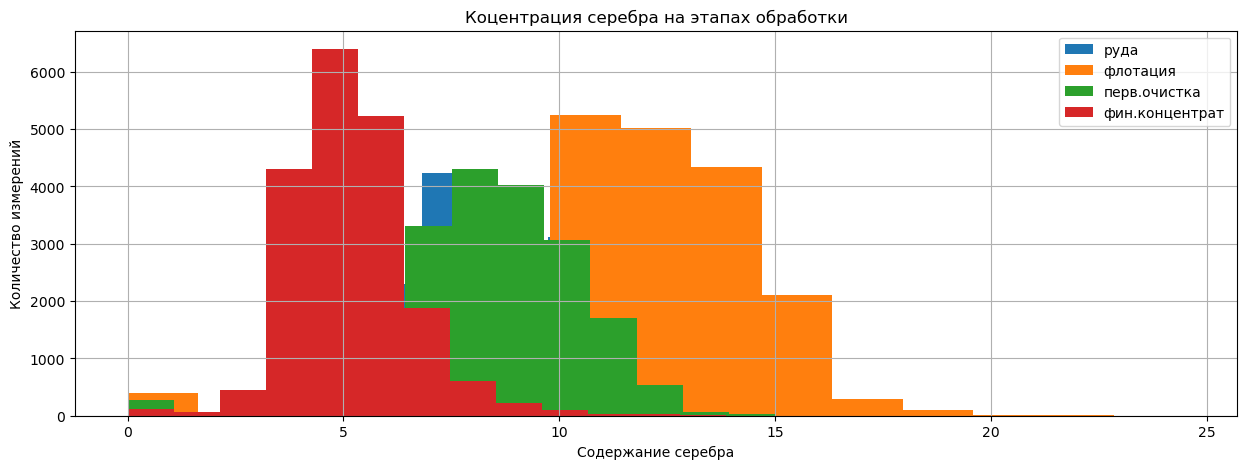

In [12]:
# анализ концентрации серебра на различных этапах

data_full['rougher.input.feed_ag'].hist(bins = 15, figsize = (15,5), label = 'руда');
data_full['rougher.output.concentrate_ag'].hist(bins = 15, figsize = (15,5), label = 'флотация');
data_full['primary_cleaner.output.concentrate_ag'].hist(bins = 15, figsize = (15,5), label = 'перв.очистка');
data_full['final.output.concentrate_ag'].hist(bins = 15, figsize = (15,5), label = 'фин.концентрат');
plt.title('Коцентрация серебра на этапах обработки')
plt.ylabel('Количество измерений')
plt.xlabel('Содержание серебра')
legend = True
plt.legend(loc='upper right')
plt.show()

Концентрация серебра колеблется от этапа к этапу, но достигает минимального значения в финальном концентрате.

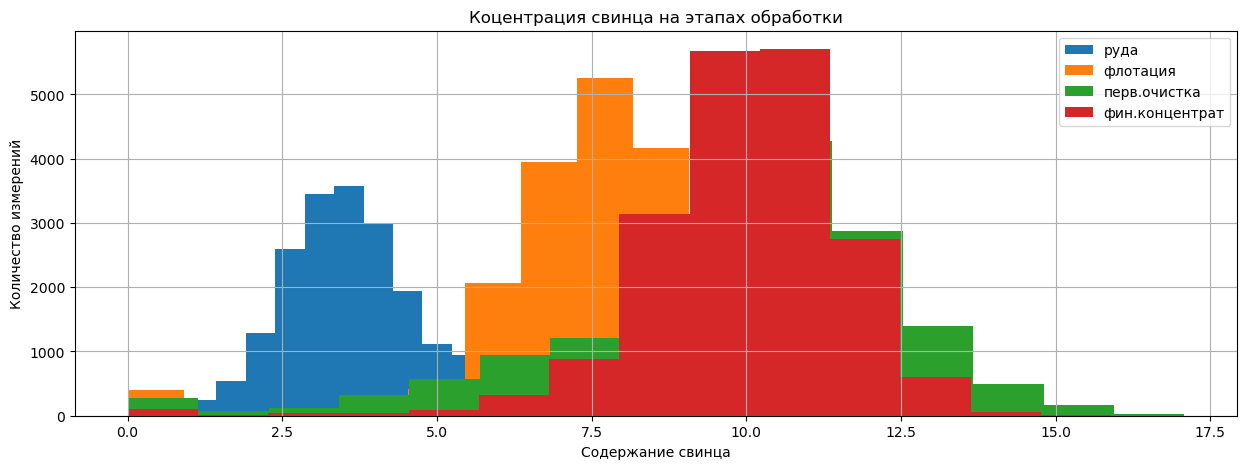

In [13]:
# анализ концентрации свинца на различных этапах

data_full['rougher.input.feed_pb'].hist(bins = 15, figsize = (15,5), label = 'руда');
data_full['rougher.output.concentrate_pb'].hist(bins = 15, figsize = (15,5), label = 'флотация');
data_full['primary_cleaner.output.concentrate_pb'].hist(bins = 15, figsize = (15,5), label = 'перв.очистка');
data_full['final.output.concentrate_pb'].hist(bins = 15, figsize = (15,5), label = 'фин.концентрат');
plt.title('Коцентрация свинца на этапах обработки')
plt.ylabel('Количество измерений')
plt.xlabel('Содержание свинца')
legend = True
plt.legend(loc='upper right')
plt.show()

Концентрация свинца в целом возрастает от этапа к этапу, но абсолютные значения в несколько раз ниже концентрации золота в финальном концентрате.

### Распределение размеров гранул

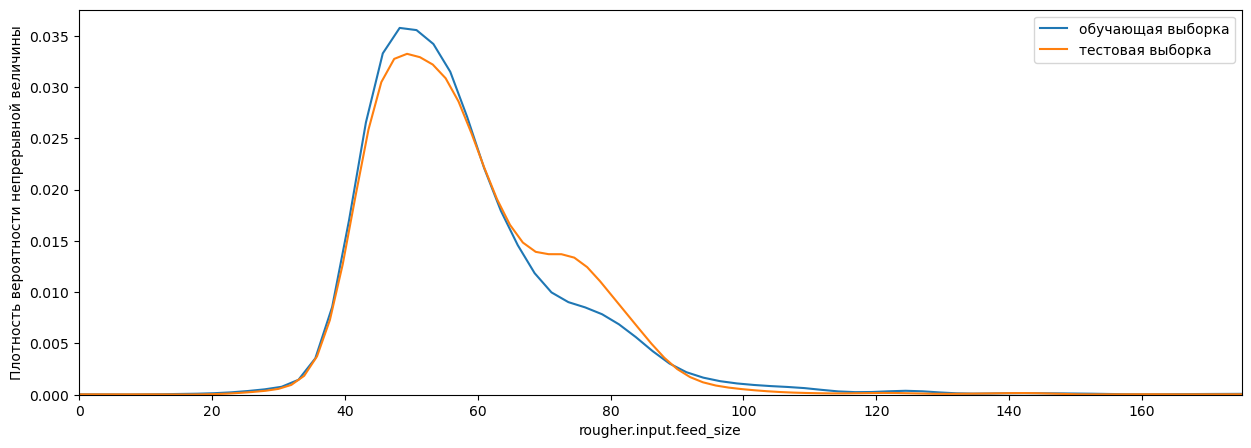

count    13052.000000
mean        58.949013
std         22.640134
min          0.049194
25%         47.328757
50%         54.464183
75%         64.096151
max        484.967466
Name: rougher.input.feed_size, dtype: float64
count    4860.000000
mean       59.136150
std        19.512497
min         0.046369
25%        47.610795
50%        55.461058
75%        66.538910
max       363.989699
Name: rougher.input.feed_size, dtype: float64


In [39]:
# распределения размеров гранул исходного сырья на обучающей и тестовой выборках

plt.figure(figsize=(15, 5))
sns.kdeplot(data_train['rougher.input.feed_size'], label='обучающая выборка')
sns.kdeplot(data_test['rougher.input.feed_size'], label='тестовая выборка')
plt.xlim([0, 175])
plt.ylabel('Плотность вероятности непрерывной величины')
plt.legend(loc='upper right')
plt.show()
print(data_train['rougher.input.feed_size'].describe())
print(data_test['rougher.input.feed_size'].describe())

Распределения размеров гранул исходного сырья на обучающей и тестовой выборках похожи, поэтому можно предположить, что оценка модели будет правильной.

### Cуммарная концентрация металлов на разных стадиях

In [15]:
# сумма металлов по стадиям

data_full['rougher.input.total'] = (
    data_full[['rougher.input.feed_au','rougher.input.feed_ag','rougher.input.feed_pb']].sum(axis = 1))

data_full['rougher.output.total'] = data_full[
    ['rougher.output.concentrate_au', 'rougher.output.concentrate_ag','rougher.output.concentrate_pb']].sum(axis = 1)

data_full['primary_cleaner.output.total'] = data_full[
    ['primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag','primary_cleaner.output.concentrate_pb']
].sum(axis = 1)

data_full['final.output.total'] = data_full[
    ['final.output.concentrate_au', 'final.output.concentrate_ag','final.output.concentrate_pb']].sum(axis = 1)

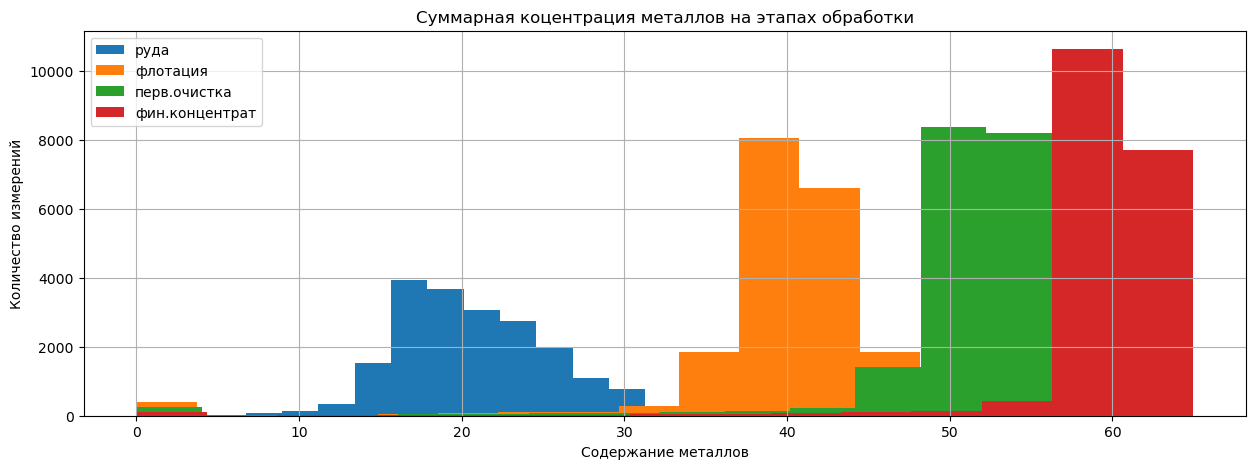

In [16]:
# анализ суммарной концентрации металлов на различных этапах

data_full['rougher.input.total'].hist(bins = 15, figsize = (15,5), label = 'руда');
data_full['rougher.output.total'].hist(bins = 15, figsize = (15,5), label = 'флотация');
data_full['primary_cleaner.output.total'].hist(bins = 15, figsize = (15,5), label = 'перв.очистка');
data_full['final.output.total'].hist(bins = 15, figsize = (15,5), label = 'фин.концентрат');
plt.title('Суммарная коцентрация металлов на этапах обработки')
plt.ylabel('Количество измерений')
plt.xlabel('Содержание металлов')
legend = True
plt.legend(loc='upper left')
plt.show()

Суммарная концентрация металлов на каждом последующем этапе обработки увеличивается и достигает максимального значения на этапе получения финального концентрата.

### Исследование выбросов

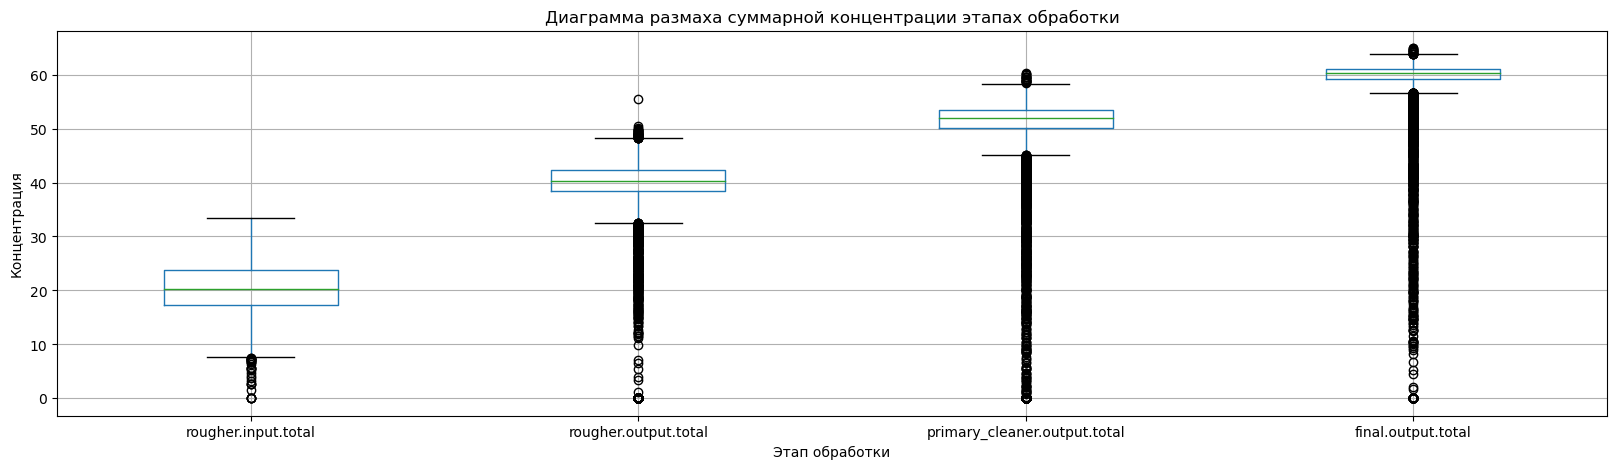

In [17]:
# исследование выбросов

data_full[['rougher.input.total','rougher.output.total', 'primary_cleaner.output.total', 'final.output.total']].\
boxplot(figsize = (20,5))
plt.title('Диаграмма размаха суммарной концентрации этапах обработки')
plt.ylabel('Концентрация')
plt.xlabel('Этап обработки')
plt.show()


Суммарные концентраты содержат множество выборосов преимущественно с "левой" стороны "усов".

In [18]:
# расчет "усов" для суммарного концентрата до этапа флотации

input_q1 = np.quantile(data_full['rougher.input.total'], 0.25)
input_q3 = np.quantile(data_full['rougher.input.total'], 0.75)
input_q3_q1 = input_q3 - input_q1
input_left_moustache = input_q1 - 3 * input_q3_q1
print('input_q1: ', input_q1)
print('input_q3: ', input_q3)
print('delta_q3_q1: ', input_q3_q1)
print('input_left_moustache', input_left_moustache)

input_q1:  17.252879439403607
input_q3:  23.79738079415382
delta_q3_q1:  6.5445013547502136
input_left_moustache -2.3806246248470337


In [19]:
# расчет "усов" для суммарного концентрата после этапа флотации

rougher_q1 = np.quantile(data_full['rougher.output.total'], 0.25)
rougher_q3 = np.quantile(data_full['rougher.output.total'], 0.75)
rougher_q3_q1 = rougher_q3 - rougher_q1
rougher_left_moustache = rougher_q1 - 3 * rougher_q3_q1
print('rougher_q1: ', rougher_q1)
print('rougher_q3: ', rougher_q3)
print('delta_q3_q1: ', rougher_q3_q1)
print('rougher_left_moustache', rougher_left_moustache)

rougher_q1:  38.39463885885074
rougher_q3:  42.36510159612477
delta_q3_q1:  3.970462737274026
rougher_left_moustache 26.48325064702866


In [20]:
# расчет "усов" для суммарного концентрата после этапа первичной очистки

primary_q1 = np.quantile(data_full['primary_cleaner.output.total'], 0.25)
primary_q3 = np.quantile(data_full['primary_cleaner.output.total'], 0.75)
primary_q3_q1 = rougher_q3 - rougher_q1
primary_left_moustache = primary_q1 - 3 * primary_q3_q1
print('primary_q1: ', primary_q1)
print('primary_q3: ', primary_q3)
print('delta_q3_q1: ', primary_q3_q1)
print('primary_left_moustache', primary_left_moustache)

primary_q1:  50.05487497433616
primary_q3:  53.38689803478148
delta_q3_q1:  3.970462737274026
primary_left_moustache 38.14348676251408


In [21]:
# расчет "усов" для суммарного концентрата на финальном этапе
final_q1 = np.quantile(data_full['final.output.total'], 0.25)
final_q3 = np.quantile(data_full['final.output.total'], 0.75)
final_q3_q1 = final_q3 - final_q1
final_left_moustache = final_q1 - 3 * final_q3_q1
print('final_q1: ', final_q1)
print('final_q3: ', final_q3)
print('delta_q3_q1: ', final_q3_q1)
print('final_left_moustache', final_left_moustache)

final_q1:  59.29832252160742
final_q3:  61.09666661301081
delta_q3_q1:  1.7983440914033935
final_left_moustache 53.90329024739724


In [22]:
# для отделения выбросов из обучающей выборки проведем расчёт суммарной концентрации для тестовых данных

data_train['rougher.input.total'] = (
    data_train[['rougher.input.feed_au','rougher.input.feed_ag','rougher.input.feed_pb']].sum(axis = 1))

data_train['rougher.output.total'] = data_train[
    ['rougher.output.concentrate_au', 'rougher.output.concentrate_ag','rougher.output.concentrate_pb']].sum(axis = 1)

data_train['primary_cleaner.output.total'] = data_train[
    ['primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag','primary_cleaner.output.concentrate_pb']
].sum(axis = 1)

data_train['final.output.total'] = data_train[
    ['final.output.concentrate_au', 'final.output.concentrate_ag','final.output.concentrate_pb']].sum(axis = 1)


In [23]:
# отделение выбросов из обучающей выборки

data_train = (
    data_train[(data_train['rougher.input.total'] >= input_left_moustache)
         &(data_train['rougher.output.total'] >= rougher_left_moustache)\
         &(data_train['primary_cleaner.output.total'] >= primary_left_moustache)\
         &(data_train['final.output.total'] >= final_left_moustache)]
)
len(data_train)

13052

Анализ выбросов в данных о суммарных концентратах на диаграмме размаха показал, что в основном выбросы расположены "слева" от "усов", поэтому такие выбросы были исключены на расстоянии трёх "ящиков" ниже первого квантиля. Это привело к удалению около 10% данных.

### Промежуточный вывод

В рамках анализа данных был проведен:
1. Анализ концентрации металлов по этапам технологического процесса, который показал следующее:
- концентрация золота значительно возрастает на каждом этапе и достигает максмального значения в финальном концентрате,
- концентрация серебра колеблется от этапа к этапу, но достигает минимального значения в финальном концентрате,
- концентрация свинца в целом возрастает от этапа к этапу, но абсолютные значения в несколько раз ниже концентрации золота в финальном концентрате.
2. Анализ распределения размеров гранул исходного сырья на обучающей и тестовой выборках, который показал, что распределения размеров гранул исходного сырья на обучающей и тестовой выборках похожи, поэтому можно предположить, что оценка модели будет правильной.
3. Анализ суммарной концентрации металлов, который показал, что на каждом последующем этапе обработки суммарная концентрация увеличивается и достигает максимального значения на этапе получения финального концентрата.
4. Анализ выбросов в данных о суммарных концентратах на диаграмме размаха показал, что в основном выбросы расположены "слева" от "усов", поэтому такие выбросы были исключены на расстоянии трёх "ящиков" ниже первого квантиля. Это привело к удалению около 10% данных.

## Модель

### Подготовка обучающих данных

In [24]:
# сохранение целевых признаков из обучающих данных

target_train = data_train[['rougher.output.recovery', 'final.output.recovery']]
target_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13052 entries, 0 to 14578
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rougher.output.recovery  13052 non-null  float64
 1   final.output.recovery    13052 non-null  float64
dtypes: float64(2)
memory usage: 305.9 KB


In [25]:
# приведение обучающих данных к формату тестовых для сопоставимости в процессе обучения модели

common_columns = data_train.columns.intersection(data_test.columns)
data_train = data_train.loc[:, common_columns]
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13052 entries, 0 to 14578
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        13052 non-null  object 
 1   rougher.input.feed_au                       13052 non-null  float64
 2   rougher.input.feed_ag                       13052 non-null  float64
 3   rougher.input.feed_pb                       13052 non-null  float64
 4   rougher.input.feed_sol                      13052 non-null  float64
 5   rougher.input.feed_rate                     13052 non-null  float64
 6   rougher.input.feed_size                     13052 non-null  float64
 7   rougher.input.floatbank10_sulfate           13052 non-null  float64
 8   rougher.input.floatbank10_xanthate          13052 non-null  float64
 9   rougher.state.floatbank10_a_air             13052 non-null  float64
 10  rougher.state.f

Датасет с обучающими данными приведен в соответветствие с тестовым датасетом (из обучающих данных удалены столбцы, отсутствующие в тестовых данных).

### Функция для оценки моделей

In [26]:
# функция sMAPE

def smape_unweighted(y_true, y_pred):
    error = abs(y_true - y_pred)
    scale = (abs(y_true) + abs(y_pred)) / 2 + 0.000000001
    result = (error / scale).mean() * 100
    return result


def smape_weighted(y_true, y_pred):
    y_true.reset_index(drop=True, inplace=True)
    y_pred = pd.DataFrame(data=y_pred)
    rougher = smape_unweighted(y_true.iloc[:, 0], y_pred.iloc[:, 0])
    final = smape_unweighted(y_true.iloc[:, 1], y_pred.iloc[:, 1])
    return 0.25 * rougher + 0.75 * final

Для оценки качества моделей подготовлена функция sMAPE, Symmetric Mean Absolute Percentage Error, симметричное среднее абсолютное процентное отклонение.

### Разделение выборок на признаки

In [27]:
# выделение целевого и прочих признаков из обучающих данных отдельно не требуется
# т.к. target_train уже был сохранен на эпате предобработки и столбцы уже были приведены в соответствие тестовым данным
# удалим нечисловой столбец 'date'

features_train = data_train.drop(['date'], axis=1)
features_test = data_test.drop(['date'], axis=1)

In [28]:
# дополнение тестовых данных целевыми показателями

data_full_target = data_full[['date','final.output.recovery', 'rougher.output.recovery']] # выделение только целевых показателей

# добавление целевых показателей к тестовому датасету по познаку 'date'
# т.к. указано, что соседние по времени параметры часто похожи
data_test_target = data_test.merge(data_full_target, on='date', how='left') 

target_test = data_test_target[['final.output.recovery', 'rougher.output.recovery']]
target_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   final.output.recovery    4860 non-null   float64
 1   rougher.output.recovery  4860 non-null   float64
dtypes: float64(2)
memory usage: 76.1 KB


### Линейная регрессия

In [29]:
mape_scorer = make_scorer(smape_unweighted, greater_is_better = False)

In [30]:
# обучение модели, построенной по алгоритму линейной регрессии

model_lr = LinearRegression()
model_lr.fit(features_train, target_train.values)
scores = cross_val_score(model_lr, features_train, target_train.values, scoring = mape_scorer)
('Средняя оценка качества модели линейной регрессии:', scores.mean().round(5))

('Средняя оценка качества модели линейной регрессии:', -8.181)

### Дерево решений в регрессии

In [31]:
# обучение модели дерева решений в регрессии и поиск оптимальной глубины

best_model = None
best_result = 10000
best_depth = 0
for depth in range(1, 6):
    model = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train.values)
    scores = cross_val_score(model, features_train, target_train.values, scoring = mape_scorer)
    result = scores.mean().round(5)
    if result < best_result:
        best_model = model
        best_result = result
        best_depth = depth

print('Средняя оценка качества модели дерева решений:', best_result, 'Глубина дерева:', best_depth)

Средняя оценка качества модели дерева решений: -8.97706 Глубина дерева: 4


### Случайный лес в регрессии

In [32]:
# обучение модели случайного леса в регрессии, поиск оптимального количества деревьев и отимальной глубины

best_model = None
best_result = 10000
best_est = 0
best_depth = 0
for est in range(10, 51, 10):
    for depth in range (1, 5):
        model = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train.values)
        scores = cross_val_score(model, features_train, target_train.values, scoring = mape_scorer)
        result = scores.mean().round(5)
        if result < best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth

print('Средняя оценка качества модели случаного леса:'
      , best_result, 'Количество деревьев:', best_est, 'Максимальная глубина:', depth)

Средняя оценка качества модели случаного леса: -7.96585 Количество деревьев: 10 Максимальная глубина: 4


Модели, обученные по алгоритмам линейной регрессии, дерева решений и случайного леса в регресии, показали примерно одинаково низкий уровень ошибки sMAPE. При этом наилучший результат показала модель, построенная по алгоритму случайного леса с количеством деревьев 10 и глубиной 4 - оценка sMAPE данной модели минимальная.

In [33]:
# сохранение модели, обученной по алгоритму случайного леса для последющей проверки на тестовых данных

model = RandomForestRegressor(random_state=12345, n_estimators=10, max_depth=4)
model.fit(features_train, target_train.values)

RandomForestRegressor(max_depth=4, n_estimators=10, random_state=12345)

In [34]:
# проверка модели на тестовых данных

predicted_test = model.predict(features_test)
predicted_test_df = pd.DataFrame(predicted_test, columns=['predictions_rougher', 'predictions_final'])
predicted_test_df

,predictions_rougher,predictions_final
0,85.283824,63.430220
1,86.803438,65.588438
2,88.393041,67.935777
3,86.803438,65.588438
4,87.768344,67.227356
...,...,...
4855,83.541622,66.255843
4856,83.541622,66.255843
4857,83.541622,66.255843
4858,83.541622,66.255843


In [35]:
# оценка качества модели

smape = smape_weighted(target_test, predicted_test_df)

'Средняя оценка качества модели:', smape.round(5)

('Средняя оценка качества модели:', 24.17828)

На тестовых данных модель продемонстрировала ухудшение качества предсказаний, т.к. ошибка sMAPE возросла до 24% (почти в три раза по сравнению с ошибкой на обущающей выборке).

### Проверка модели на адекватность

In [36]:
# подготовка dummy-модели с медианными показателями

dummy_regr = DummyRegressor(strategy="median")
dummy_regr.fit(features_train, target_train)
predicted_dummy = dummy_regr.predict(features_test)

In [37]:
# оценка качества dummy-модели

smape_dummy = smape_weighted(target_test, predicted_dummy)

'Средняя оценка качества dummy-модели:', smape_dummy.round(5)

('Средняя оценка качества dummy-модели:', 23.47806)

### Промежуточный вывод

Для оценки качества моделей подготовлена функция sMAPE, Symmetric Mean Absolute Percentage Error, симметричное среднее абсолютное процентное отклонение.

Модели, обученные по алгоритмам линейной регрессии, дерева решений и случайного леса в регресии, показали примерно одинаково низкий уровень ошибки sMAPE. При этом наилучший результат показала модель, построенная по алгоритму случайного леса с количеством деревьев 20 и глубиной 4 - оценка sMAPE данной модели минимальная.

Для проверки модели на тестовых данных использована модель, построенная по алгоритму случайного леса с количеством деревьев 20 и глубиной 4.

На тестовых данных модель продемонстрировала ухудшение качества предсказаний, т.к. ошибка sMAPE возросла до 24% (почти в три раза по сравнению с ошибкой на обущающей выборке).

Для проверки модели на адекватность добавлена dummy-модель с медианными данными, которая показывает размер ошибки sMAPE 23.5%, т.е. на 0.5% ниже модели случайного леса. Это говорит о том, что необходимо либо доработать модель до целевого показателя sMAPE при его наличии, либо возможно использовать модель с  медианными данными.

## Общий вывод

Компания «Цифры» разрабатывает решения для эффективной работы промышленных предприятий. Компании были предоставлены данные с параметрами добычи и очистки.

Задача: подготовить прототип модели машинного обучения для предприятия; модель должна предсказать коэффициент восстановления золота из золотосодержащей руды с целью оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

В ходе работы над проектом были выполнены следующие шаги: 

### Подготовка данных

В рамках данного шага были загружены предоставленные данные и проведена предобработка.

По результатам предобработки данных можно сделать следующие выводы:

1. Датасет с обущающими данными содержит определенный объем данных, дубликаты не обнаружены, при этом датасет содержит пропуски несущественного объема данных (менее 5% и во второстепенных данных).

2. Датасет с тестовыми данными содержит меньший набор признаков по сравнению в обучающими данными, дубликаты не обнаружены, при этом датасет содержит пропуски несущественного объема данных (менее 2% и во второстепенных данных). В тествой выборке не содержатся данные о результатах выполенных этапов флотации и двух очисток - выходные данные о концентрации металлов и количестве отвальных хвостов на каждом из этапов. Это отсутствие объясняется тем, что для целей теста технлогические процессы по выделению финального концентрата еще не произошли, т.к. именно модель должна предсказать их результат.

3. Датасет с полными данными представляет собой объединение тестовых и обучающих данных, дубликаты не обнаружены, при этом датасет содержит пропуски несущественного объема данных менее 5% по ряду столбцов и около 9% в столбце secondary_cleaner.output.tail_sol, которые представляет собой второстепенные данные.

4. Целевой признак эффективности обогащения, recovery, был пересчитан вручную для проверки данных. Ручной пересчёт показал, что разница с имеющимися показателями recovery стремится к 0, поэтому можно сделать вывод, что в датасете содержатся корретные показатели эффективности обогащения rougher.output.recovery и final.output.recovery (после этапов флотации и очистки).

В рамках предобработки данных:
- пропуски в всех трёх датасетах заполнены ближайшими значениями.

### Анализ данных

В рамках анализа данных был проведен:

1. Анализ концентрации металлов по этапам технологического процесса, который показал следующее:
- концентрация золота значительно возрастает на каждом этапе и достигает максмального значения в финальном концентрате,
- концентрация серебра колеблется от этапа к этапу, но достигает минимального значения в финальном концентрате,
- концентрация свинца в целом возрастает от этапа к этапу, но абсолютные значения в несколько раз ниже концентрации золота в финальном концентрате.
2. Анализ распределения размеров гранул исходного сырья на обучающей и тестовой выборках, который показал, что распределения размеров гранул исходного сырья на обучающей и тестовой выборках похожи, поэтому можно предположить, что оценка модели будет правильной.
3. Анализ суммарной концентрации металлов, который показал, что на каждом последующем этапе обработки суммарная концентрация увеличивается и достигает максимального значения на этапе получения финального концентрата.
4. Анализ выбросов в данных о суммарных концентратах на диаграмме размаха показал, что в основном выбросы расположены "слева" от "усов", поэтому такие выбросы были исключены на расстоянии трёх "ящиков" ниже первого квантиля. Это привело к удалению около 10% данных.

### Обучение модели и тестирование

Перед обучением модели датасет с обучающими данными был приведен в соответветствие с тестовым датасетом (из обучающих данных удалены столбцы, отсутствующие в тестовых данных).

Для оценки качества моделей подготовлена функция sMAPE, Symmetric Mean Absolute Percentage Error, симметричное среднее абсолютное процентное отклонение.

Модели, обученные по алгоритмам линейной регрессии, дерева решений и случайного леса в регресии, показали примерно одинаково низкий уровень ошибки sMAPE. При этом наилучший результат показала модель, построенная по алгоритму случайного леса с количеством деревьев 20 и глубиной 4 - оценка sMAPE данной модели минимальная.

Для проверки модели на тестовых данных использована модель, построенная по алгоритму случайного леса с количеством деревьев 10 и глубиной 4.

На тестовых данных модель продемонстрировала ухудшение качества предсказаний, т.к. ошибка sMAPE возросла до 24% (почти в три раза по сравнению с ошибкой на обущающей выборке).

Для проверки модели на адекватность добавлена dummy-модель с медианными данными, которая показывает размер ошибки sMAPE 23.5%, т.е. на 0.5% ниже модели случайного леса. Это говорит о том, что необходимо либо доработать модель до целевого показателя sMAPE при его наличии, либо возможно использовать модель с  медианными данными.